In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\sadin\Desktop\IMARTICUS\PYTHON\DATA SETS\VACCINE"

C:\Users\sadin\Desktop\IMARTICUS\PYTHON\DATA SETS\VACCINE


In [3]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [4]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [5]:
vaccinelables=pd.read_csv("training_set_labels.csv")

In [6]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [8]:
vaccinetrain["data"]="train"
vaccinetest["data"]="test"

In [9]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [10]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
original=combinedf

In [13]:
mask=combinedf.isnull()

In [14]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [15]:
combinedf=combinedf.where(~mask,original)

In [16]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                53415 non-null  int64 
 1   h1n1_concern                 53238 non-null  object
 2   h1n1_knowledge               53177 non-null  object
 3   behavioral_antiviral_meds    53265 non-null  object
 4   behavioral_avoidance         52994 non-null  object
 5   behavioral_face_mask         53377 non-null  object
 6   behavioral_wash_hands        53333 non-null  object
 7   behavioral_large_gatherings  53256 non-null  object
 8   behavioral_outside_home      53251 non-null  object
 9   behavioral_touch_face        53159 non-null  object
 10  doctor_recc_h1n1             49095 non-null  object
 11  doctor_recc_seasonal         49095 non-null  object
 12  chronic_med_condition        51512 non-null  object
 13  child_under_6_months         51

In [17]:
from sklearn.experimental import enable_iterative_imputer

In [18]:
from sklearn.impute import IterativeImputer

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy="most_frequent",max_iter=10)

In [21]:
combinedf1=combinedf.drop(["respondent_id","data"],axis=1)

In [22]:
combinedf1_impute=imputer.fit_transform(combinedf1)

C:\Users\sadin\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\sadin\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
combinedf1_impute=pd.DataFrame(combinedf1_impute,columns=combinedf1.columns)

In [24]:
combinedf1_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

In [25]:
combinedf1_impute=combinedf1_impute.reset_index()

In [26]:
combinedf=combinedf.reset_index()

In [27]:
combinedf1_impute["data"]=combinedf.data

In [28]:
vaccinetraindf=combinedf1_impute[combinedf1_impute.data==1]
vaccinetestdf=combinedf1_impute[combinedf1_impute.data==0]

In [29]:
print(vaccinetestdf.shape)
print(vaccinetraindf.shape)

(26708, 37)
(26707, 37)


In [30]:
vaccinetraindf.head()

,index,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,data
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,8.0,2.0,0.0,0.0,13.0,20.0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,5.0,1.0,0.0,0.0,13.0,20.0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0,1


In [31]:
vaccinetraindf=vaccinetraindf.drop(["index","data"],axis=1)

In [32]:
vaccinetestdff=vaccinetestdf.drop(["index","data"],axis=1)

In [33]:
# SEASONAL VACCINE PRDICTION
y=vaccinelables.seasonal_vaccine
X=vaccinetraindf

<AxesSubplot: >

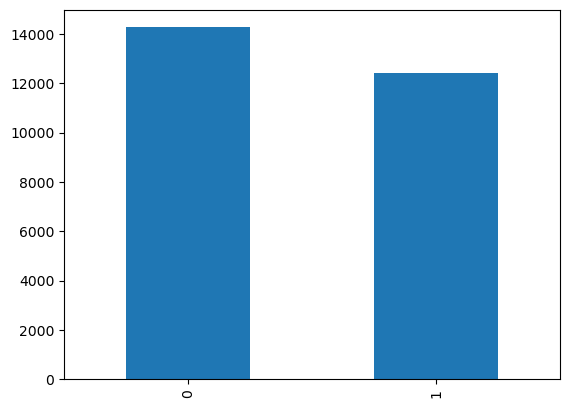

In [34]:
y.value_counts().plot(kind="bar")

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logit=LogisticRegression(max_iter=1000)

In [41]:
logitmodel=logit.fit(X,y)

In [42]:
logitmodel.score(X,y)

0.7723817725689894

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [44]:
logitpredict=logitmodel.predict(X)

In [45]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



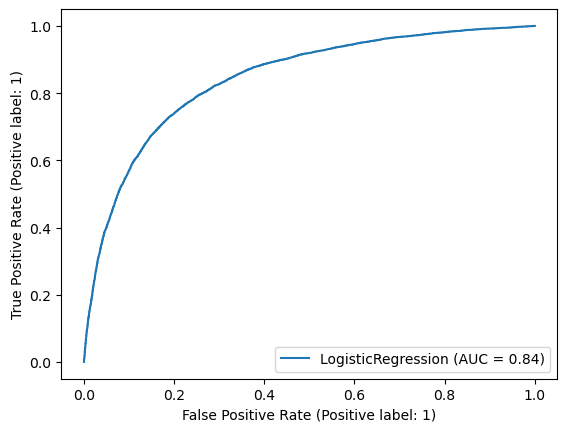

In [46]:
RocCurveDisplay.from_estimator(logit,X,y)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
tree=DecisionTreeClassifier(max_depth=10)

In [76]:
treemodel=tree.fit(X,y)

In [77]:
treemodel.score(X,y)

0.814655333807616

In [78]:
cross_val_score(tree,X,y)

array([0.73137402, 0.73493074, 0.74723834, 0.74798727, 0.74424265])

In [79]:
treepredict=treemodel.predict(X)

In [80]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     14272
           1       0.81      0.78      0.80     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



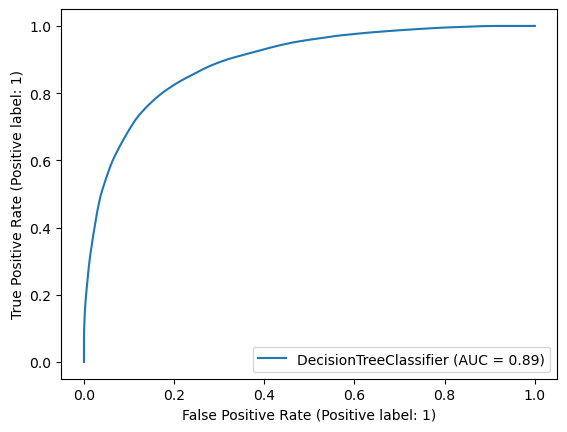

In [81]:
RocCurveDisplay.from_estimator(tree,X,y)

In [82]:
pd.DataFrame(treemodel.feature_importances_,X.columns).sort_values(by=0,ascending=False)

,0
opinion_seas_vacc_effective,0.308517
doctor_recc_seasonal,0.173186
opinion_seas_risk,0.127023
age_group,0.093711
employment_occupation,0.037249
employment_industry,0.024048
opinion_seas_sick_from_vacc,0.023346
health_worker,0.017340
h1n1_knowledge,0.016541
hhs_geo_region,0.015441


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf=RandomForestClassifier(n_estimators=700,max_depth=10)

In [99]:
rfmodel=rf.fit(X,y)

In [100]:
rfmodel.score(X,y)

0.8217321301531434

In [101]:
cross_val_score(rf,X,y)

array([0.77293149, 0.77330588, 0.77719528, 0.77775697, 0.77513574])

In [102]:
rfpredict=rfmodel.predict(X)

In [103]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     14272
           1       0.82      0.78      0.80     12435

    accuracy                           0.82     26707
   macro avg       0.82      0.82      0.82     26707
weighted avg       0.82      0.82      0.82     26707



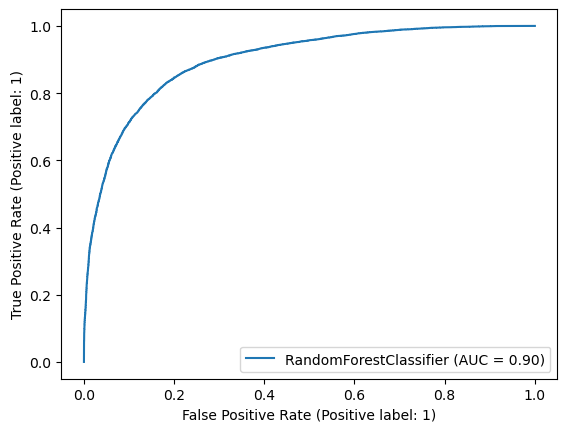

In [104]:
RocCurveDisplay.from_estimator(rf,X,y)

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
gb=GradientBoostingClassifier()

In [107]:
gbmodel=gb.fit(X,y)

In [108]:
gbmodel.score(X,y)

0.7867974688283971

In [109]:
cross_val_score(gb,X,y)

array([0.78079371, 0.78304006, 0.77869313, 0.78562067, 0.77513574])

In [110]:
gbpredict=gbmodel.predict(X)

In [111]:
print(classification_report(y,gbpredict))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     14272
           1       0.78      0.75      0.77     12435

    accuracy                           0.79     26707
   macro avg       0.79      0.78      0.79     26707
weighted avg       0.79      0.79      0.79     26707



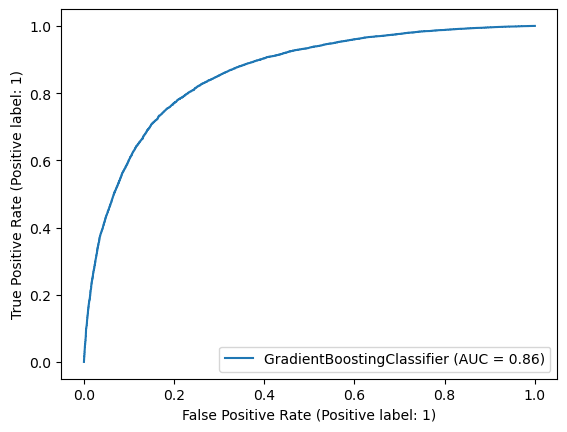

In [112]:
RocCurveDisplay.from_estimator(gb,X,y)